#IMPORTING IMP LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IMPORTING THE DATASET

In [2]:
df=pd.read_csv("metabolic_relation_network.csv")
df.head(10)


,Pathway,Nodes,Edges,Connected Components,Network Diameter,Network Radius,Shortest Path,Characteristic Path Length,Avg.num.Neighbours,Isolated Nodes,...,Stress,SelfLoops,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient
0,aac00010,26,43,2,7,1,211,3.222749,3.230769,0,...,27.000000,0,0.076923,3.307692,0.062418,1.653846,3.923077,0.375199,2.210114,0.221154
1,aac00020,27,52,2,10,1,226,3.411504,3.851852,0,...,26.629630,0,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197
2,aac00030,26,53,2,6,1,202,2.732673,3.769231,0,...,14.961538,0,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311
3,aac00040,20,28,1,8,1,65,2.523077,2.600000,0,...,4.950000,0,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000
4,aac00051,15,33,1,4,2,85,1.858824,4.400000,0,...,5.000000,0,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222
5,aac00052,18,29,3,4,1,75,2.133333,3.000000,0,...,6.944444,0,0.222222,3.222222,0.061111,1.611111,1.944444,0.473544,1.444753,0.253571
6,aac00061,46,74,1,4,1,337,2.611276,3.086957,0,...,11.804348,0,0.086957,3.173913,0.005962,1.586957,1.086957,0.325266,0.890847,0.058015
7,aac00071,37,67,2,16,1,383,4.360313,3.405405,0,...,34.783784,0,0.000000,3.405405,0.031002,1.702703,5.810811,0.352584,3.354656,0.120828
8,aac00072,8,14,1,2,1,19,1.263158,3.500000,0,...,0.875000,0,0.000000,3.500000,0.014881,1.750000,0.875000,0.409722,0.623214,0.393750
9,aac00130,12,11,2,6,1,29,2.310345,1.833333,0,...,3.166667,0,0.000000,1.833333,0.118056,0.916667,2.166667,0.466865,1.444444,0.069444


In [3]:
df.isna().sum()

Pathway                          0
Nodes                            0
Edges                            0
Connected Components             0
Network Diameter                 0
Network Radius                   0
Shortest Path                    0
Characteristic Path Length       0
Avg.num.Neighbours               0
Isolated Nodes                   0
Number of Self Loops             0
Multi-edge Node Pair             0
NeighborhoodConnectivity         0
Outdegree                        0
Stress                           0
SelfLoops                        0
PartnerOfMultiEdgedNodePairs     0
EdgeCount                        0
BetweennessCentrality            0
Indegree                         0
Eccentricity                     0
ClosenessCentrality              0
AverageShortestPathLength        0
ClusteringCoefficient            0
dtype: int64

In [4]:
df.shape

(53413, 24)

In [5]:
df.dtypes

Pathway                           object
Nodes                              int64
Edges                              int64
Connected Components               int64
Network Diameter                   int64
Network Radius                     int64
Shortest Path                      int64
Characteristic Path Length       float64
Avg.num.Neighbours               float64
Isolated Nodes                     int64
Number of Self Loops               int64
Multi-edge Node Pair               int64
NeighborhoodConnectivity         float64
Outdegree                        float64
Stress                           float64
SelfLoops                          int64
PartnerOfMultiEdgedNodePairs     float64
EdgeCount                        float64
BetweennessCentrality            float64
Indegree                         float64
Eccentricity                     float64
ClosenessCentrality              float64
AverageShortestPathLength        float64
ClusteringCoefficient            float64
dtype: object

In [6]:
df.nunique()

Pathway                          53413
Nodes                              103
Edges                              358
Connected Components                13
Network Diameter                    21
Network Radius                       2
Shortest Path                      920
Characteristic Path Length        6066
Avg.num.Neighbours                2411
Isolated Nodes                       2
Number of Self Loops                 1
Multi-edge Node Pair                44
NeighborhoodConnectivity         12001
Outdegree                         2469
Stress                            4771
SelfLoops                            1
PartnerOfMultiEdgedNodePairs       529
EdgeCount                         2469
BetweennessCentrality             9484
Indegree                          2469
Eccentricity                      2037
ClosenessCentrality              13595
AverageShortestPathLength        12729
ClusteringCoefficient            10479
dtype: int64

In [7]:
df = df.drop("Pathway ",axis=1)

In [8]:
X = df.drop("NeighborhoodConnectivity ",axis=1)
y=df["NeighborhoodConnectivity "]

# SPLITTING THE DATASET

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# FEATURE SCALING

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# APPLYING PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components =15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
reg1_a = LinearRegression()
reg2_r= SVR(kernel = 'rbf')
reg3_v= DecisionTreeRegressor(random_state = 0)
reg4_a= RandomForestRegressor(n_estimators = 15, random_state = 0)


In [13]:
reg=[reg1_a,reg2_r,reg3_v,reg4_a,reg1_a]
reg_list=['lra','dtrr','svry','rfra','polyn']
import time 
r_score={}
t={}
for model,model_name in zip(reg,reg_list):
    if model_name=='poly':
      X_train=poly_reg.fit_transform(X_train)
      X_test=poly_reg.fit_transform(X_test)
    start=time.time()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    et=time.time()
    r_score[model_name]=r2_score(y_test,pred)
    t[model_name]=et-start

In [14]:
for i,j in r_score.items():
    print(i,':-',j)

lra :- 0.9438742874635677
dtrr :- 0.9792836507030624
svry :- 0.9819923879654109
rfra :- 0.9905527421780146
polyn :- 0.9438742874635677


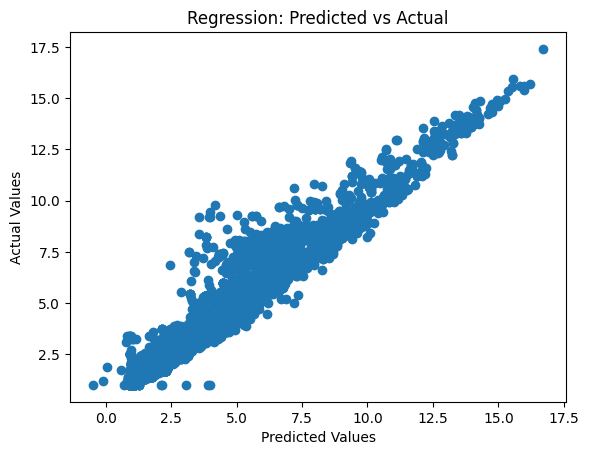

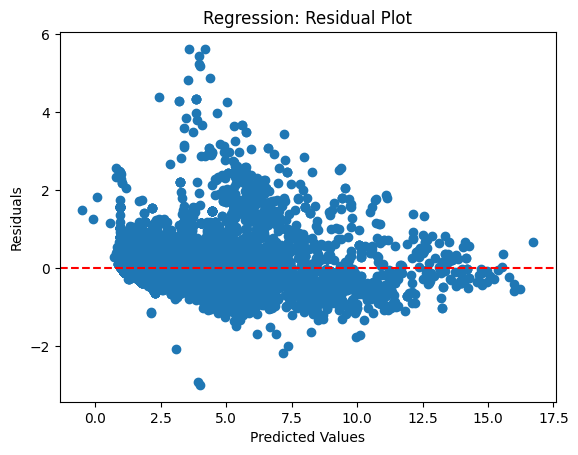

In [15]:
import matplotlib.pyplot as plt

# Assuming you have the predicted values in 'y_pred' and actual values in 'y_actual'

# Scatter Plot
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Regression: Predicted vs Actual')
plt.show()

# Residual Plot
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Regression: Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.show()